In [2]:
import pandas as pd
with open('./coronavirusdataset/PatientInfo.csv', 'rb') as infile:
    patient_info = pd.read_csv(infile)
    
with open('./coronavirusdataset/PatientRoute.csv', 'rb') as infile:
    patient_route = pd.read_csv(infile)

In [3]:
len(patient_info.patient_id.unique())

3519

In [4]:
len(patient_route.patient_id.unique())

1319

In [5]:
data = pd.merge(patient_info, patient_route, on='patient_id')
data = data[data['province_x'] == 'Seoul']

In [6]:
data

,patient_id,global_num_x,sex,birth_year,age,country,province_x,city_x,disease,infection_case,...,released_date,deceased_date,state,global_num_y,date,province_y,city_y,type,latitude,longitude
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,2020-02-05,NaN,released,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,2020-02-05,NaN,released,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-03-02,NaN,released,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-03-02,NaN,released,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-03-02,NaN,released,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,1000000711,10987.0,NaN,NaN,NaN,Korea,Seoul,Nowon-gu,NaN,overseas inflow,...,NaN,NaN,isolated,10987.0,2020-05-13,Seoul,Jungnang-gu,hospital,37.612772,127.098167
3258,1000000712,NaN,NaN,NaN,NaN,Korea,Seoul,Gangbuk-gu,NaN,NaN,...,NaN,NaN,isolated,NaN,2020-04-30,Seoul,Yeongdeungpo-gu,etc,37.539111,126.903394
3259,1000000712,NaN,NaN,NaN,NaN,Korea,Seoul,Gangbuk-gu,NaN,NaN,...,NaN,NaN,isolated,NaN,2020-05-09,Seoul,Yeongdeungpo-gu,beauty_salon,37.535056,126.899351
3260,1000000712,NaN,NaN,NaN,NaN,Korea,Seoul,Gangbuk-gu,NaN,NaN,...,NaN,NaN,isolated,NaN,2020-05-12,Seoul,Yeongdeungpo-gu,hospital,37.533121,126.903804


In [7]:
len(data.patient_id.unique())

640

In [8]:
pd.isna(data['infected_by']).sum()

2733

In [9]:
import networkx as nx

#instantiation of the undirected graph
G = nx.Graph()
G.add_nodes_from(list(data['patient_id'].unique()))


for idx in data.index:
    if not(pd.isna(data['infected_by'][idx])):
        G.add_edge(data['patient_id'][idx],data['infected_by'][idx], weight=float(1))
        


len(G), G.size()

(644, 111)

In [10]:
## making groups of people who may have been infecting each other
groups = data.groupby(['latitude', 'longitude', 'type'])['patient_id'].unique().apply(list).tolist()

In [11]:
groups[143]

[1000000350, 1000000351]

In [12]:
data[data.patient_id == 1000000350][['latitude', 'longitude', 'type']]

,latitude,longitude,type
1807,37.456256,126.705206,airport
1808,37.460191,126.440696,airport
1809,37.500014,126.923893,hospital
1810,37.504569,126.940919,hospital
1811,37.474912,126.980874,lodging
1812,37.473636,126.981142,etc
1813,37.473697,126.981411,etc
1814,37.474912,126.980874,lodging


In [13]:
data[data.patient_id == 1000000351][['latitude', 'longitude', 'type']]

,latitude,longitude,type
1815,37.456256,126.705206,airport
1816,37.460191,126.440696,airport
1817,37.500014,126.923893,hospital
1818,37.504569,126.940919,hospital
1819,37.474912,126.980874,lodging
1820,37.473636,126.981142,etc
1821,37.473697,126.981411,etc
1822,37.474912,126.980874,lodging


In [14]:
for elt in groups:
    if len(elt) > 1:
        for i in range(len(elt)-1):
            G.add_edge(elt[i], elt[i++1], t=float(0.1))
            
len(G), G.size()

(644, 1170)

In [15]:
import numpy as np

char_path_length = 'not connected'
pos_max = np.argmax([len(listElem) for listElem in sorted(nx.connected_components(G))])
char_path_length_component = [nx.average_shortest_path_length(G.subgraph(g)) for g in sorted(nx.connected_components(G))][pos_max]

density = nx.density(G)
degree = sum(dict(G.degree()).values())/len(G)
transitivity = nx.transitivity(G)
clustering_coef = nx.average_clustering(G)

n_connected_comp = nx.number_connected_components(G)
size_connected_comp = sum([len(listElem) for listElem in sorted(nx.connected_components(G))])/len(sorted(nx.connected_components(G)))

print(f'original characteristic path length {char_path_length}, \noriginal characteristic path length of biggest component {char_path_length_component},\noriginal network density {density},\noriginal network average degree {degree},\noriginal transitivity {transitivity}, \noriginal average clustering coefficient {clustering_coef}, \noriginal number of connected components {n_connected_comp}, \noriginal average size of a connected component {size_connected_comp}')

original characteristic path length not connected, 
original characteristic path length of biggest component 5.6461423956740555,
original network density 0.005650918153453822,
original network average degree 3.6335403726708075,
original transitivity 0.06745737583395107, 
original average clustering coefficient 0.07180198166223016, 
original number of connected components 14, 
original average size of a connected component 46.0


In [16]:
import Visualizer

In [17]:
def simulate_sirs(G,beta,gamma,xi,f,lst_initial_immune,lst_initial_infected):
    attDict = {}
    for node in lst_initial_immune:
        attDict[node] = [0]
    for node in lst_initial_infected:
        attDict[node] = [1]
    t = 0
    D = []
    D.append([len(lst_initial_immune), len(lst_initial_infected), 0])
    while t < f:
        S = 0
        I = 0
        R = 0
        for node in list(attDict.keys()):
            if attDict[node][t] == 0:
                if np.random.random() < beta:
                    attDict[node].append(1)
                    I += 1
                else:
                    attDict[node].append(0)
                    S += 1
            if attDict[node][t] == 1:
                if np.random.random() < gamma:
                    attDict[node].append(2)
                    R += 1
                else:
                    attDict[node].append(1)
                    I += 1
            if attDict[node][t] == 2:
                if np.random.random() < xi:
                    attDict[node].append(0)
                    S += 1
                else:
                    attDict[node].append(2)
                    R += 1
        D.append([S,I,R])
        t+=1
    nx.set_node_attributes(G,attDict,"state")
    return D

In [18]:
D = simulate_sirs(G, 0.25, 0.05, 0.0001, 35, list(G.nodes)[:640], list(G.nodes)[640:])
print(D)

[[640, 4, 0], [477, 167, 0], [347, 290, 7], [255, 363, 26], [187, 417, 40], [139, 448, 57], [108, 460, 76], [83, 467, 94], [65, 462, 117], [51, 455, 138], [33, 455, 156], [25, 440, 179], [20, 418, 206], [14, 408, 222], [13, 384, 247], [12, 368, 264], [9, 354, 281], [5, 343, 296], [2, 331, 311], [2, 316, 326], [1, 299, 344], [0, 290, 354], [0, 276, 368], [0, 266, 378], [0, 259, 385], [0, 242, 402], [0, 225, 419], [0, 214, 430], [0, 204, 440], [0, 193, 451], [0, 185, 459], [0, 175, 469], [0, 164, 480], [0, 157, 487], [0, 144, 500], [0, 138, 506]]


In [19]:
Visualizer.showSIRS(G, "test_simulation_real_data.html", 0.25, 0.05, 0.0001, 35, D)

Nodes positions computed.
Edges trace computed.
Nodes trace computed.
Frames computed.
Figure generated.
Visualization rendering done
File saved.


In [20]:
Visualizer.showData(D, "test_data_real_data.html", 0.25, 0.05, 0.0001)

In [21]:
data[['date', 'released_date', 'deceased_date']]

,date,released_date,deceased_date
0,2020-01-22,2020-02-05,NaN
1,2020-01-24,2020-02-05,NaN
2,2020-01-25,2020-03-02,NaN
3,2020-01-26,2020-03-02,NaN
4,2020-01-26,2020-03-02,NaN
...,...,...,...
3257,2020-05-13,NaN,NaN
3258,2020-04-30,NaN,NaN
3259,2020-05-09,NaN,NaN
3260,2020-05-12,NaN,NaN


In [22]:
data['date'] = pd.to_datetime(data['date'])
data['released_date'] = pd.to_datetime(data['released_date'])
data['deceased_date'] = pd.to_datetime(data['deceased_date'])

In [23]:
data[['date', 'released_date', 'deceased_date']]

,date,released_date,deceased_date
0,2020-01-22,2020-02-05,NaT
1,2020-01-24,2020-02-05,NaT
2,2020-01-25,2020-03-02,NaT
3,2020-01-26,2020-03-02,NaT
4,2020-01-26,2020-03-02,NaT
...,...,...,...
3257,2020-05-13,NaT,NaT
3258,2020-04-30,NaT,NaT
3259,2020-05-09,NaT,NaT
3260,2020-05-12,NaT,NaT


In [24]:
data['date'].min()

Timestamp('2020-01-22 00:00:00')

In [25]:
data['date'].max()

Timestamp('2020-05-13 00:00:00')

In [26]:
basedate = data['date'].min()
data['date num'] = data['date'].apply(lambda x: (x - basedate).days)
data['date released num'] = data['released_date'].apply(lambda x: (x - basedate).days)
data['date deceased num'] = data['deceased_date'].apply(lambda x: (x - basedate).days)
data[['date num', 'date released num', 'date deceased num']]

,date num,date released num,date deceased num
0,0,14.0,NaN
1,2,14.0,NaN
2,3,40.0,NaN
3,4,40.0,NaN
4,4,40.0,NaN
...,...,...,...
3257,112,NaN,NaN
3258,99,NaN,NaN
3259,108,NaN,NaN
3260,111,NaN,NaN


<Figure size 432x288 with 0 Axes>

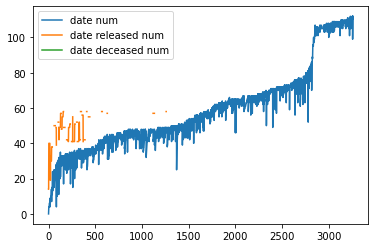

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
df = data[['date num', 'date released num', 'date deceased num']]
df = df.plot()
plt.figure()

In [28]:
sum(data['date deceased num'].notna())

0

In [29]:
sum(data['date released num'].notna())

304

In [30]:
data['date num'].max()

112

In [31]:
df = data.drop_duplicates(subset='patient_id')
data.shape, df.shape

((3262, 28), (640, 28))

In [32]:
def num_infected_at_time(data, time):
    num_infected = sum(data['date num'] < time)
    num_released = sum(data['date released num'] < time)
    return num_infected, num_released

In [33]:
#number of infected and number of recovered every 7 days
for i in range(0,112,6):
    print(num_infected_at_time(df, i))

(0, 0)
(4, 0)
(13, 0)
(19, 1)
(28, 2)
(56, 5)
(92, 8)
(134, 18)
(220, 25)
(268, 39)
(334, 51)
(416, 51)
(497, 51)
(538, 51)
(556, 51)
(561, 51)
(564, 51)
(577, 51)
(624, 51)


In [34]:
with open('./coronavirusdataset/Time.csv', 'rb') as infile:
    time = pd.read_csv(infile)

In [35]:
time[['confirmed', 'released', 'deceased']]

,confirmed,released,deceased
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,2,0,0
...,...,...,...
111,10874,9610,256
112,10909,9632,256
113,10936,9670,258
114,10962,9695,259


In [36]:
10991/640

17.1734375

In [37]:
time[['confirmed', 'released', 'deceased']] / 17.1734375 

,confirmed,released,deceased
0,0.058229,0.000000,0.000000
1,0.058229,0.000000,0.000000
2,0.058229,0.000000,0.000000
3,0.058229,0.000000,0.000000
4,0.116459,0.000000,0.000000
...,...,...,...
111,633.187153,559.585115,14.906742
112,635.225184,560.866163,14.906742
113,636.797380,563.078883,15.023201
114,638.311346,564.534619,15.081430


In [38]:
infected_at_t = []
recovered_at_t = []
for i in range(14,112,6):
    print('total cases', int(time.loc[i,'confirmed'] / 17.1734375),)
    print('total recovered', int(time.loc[i,'released'] / 17.1734375),)
    print('total dead', int(time.loc[i,'deceased'] / 17.1734375), '\n')
    infected_at_t.append(int(time.loc[i,'confirmed'] / 17.1734375) - int(time.loc[i,'released'] / 17.1734375) - int(time.loc[i,'deceased'] / 17.1734375))
    recovered_at_t.append(int(time.loc[i,'released'] / 17.1734375))

total cases 0
total recovered 0
total dead 0 

total cases 1
total recovered 0
total dead 0 

total cases 1
total recovered 0
total dead 0 

total cases 11
total recovered 0
total dead 0 

total cases 102
total recovered 1
total dead 0 

total cases 310
total recovered 2
total dead 1 

total cases 437
total recovered 14
total dead 3 

total cases 479
total recovered 66
total dead 4 

total cases 518
total recovered 169
total dead 6 

total cases 551
total recovered 280
total dead 8 

total cases 585
total recovered 350
total dead 10 

total cases 606
total recovered 406
total dead 11 

total cases 616
total recovered 443
total dead 13 

total cases 622
total recovered 478
total dead 13 

total cases 625
total recovered 510
total dead 14 

total cases 628
total recovered 534
total dead 14 

total cases 631
total recovered 557
total dead 14 



In [39]:
with open('./coronavirusdataset/TimeProvince.csv', 'rb') as infile:
    time = pd.read_csv(infile)
    
time = time[time.province=='Seoul'].reset_index()

In [40]:
time[['confirmed', 'released', 'deceased']]

,confirmed,released,deceased
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
111,663,541,2
112,683,545,2
113,695,554,2
114,707,558,3


In [41]:
711/640

1.1109375

In [42]:
for i in range(14,112,6):
    print('total cases', int(time.loc[i,'confirmed'] /1.1109375),)
    print('total recovered', int(time.loc[i,'released'] /1.1109375),)
    print('total dead', int(time.loc[i,'deceased'] /1.1109375), '\n')

total cases 4
total recovered 0
total dead 0 

total cases 12
total recovered 0
total dead 0 

total cases 12
total recovered 1
total dead 0 

total cases 24
total recovered 4
total dead 0 

total cases 50
total recovered 7
total dead 0 

total cases 89
total recovered 17
total dead 0 

total cases 126
total recovered 27
total dead 0 

total cases 227
total recovered 46
total dead 0 

total cases 291
total recovered 57
total dead 0 

total cases 351
total recovered 83
total dead 0 

total cases 455
total recovered 117
total dead 0 

total cases 531
total recovered 156
total dead 1 

total cases 555
total recovered 215
total dead 1 

total cases 563
total recovered 283
total dead 1 

total cases 566
total recovered 353
total dead 1 

total cases 573
total recovered 425
total dead 1 

total cases 584
total recovered 482
total dead 1 



In [43]:
infected_at_t

[0, 1, 1, 11, 101, 307, 420, 409, 343, 263, 225, 189, 160, 131, 101, 80, 60]

In [44]:
recovered_at_t

[0, 0, 0, 0, 1, 2, 14, 66, 169, 280, 350, 406, 443, 478, 510, 534, 557]

In [45]:
simulated_infected_at_t = [D[i][1] for i in range(len(D)) if i % 2 != 1]
print(simulated_infected_at_t)

[4, 290, 417, 460, 462, 455, 418, 384, 354, 331, 299, 276, 259, 225, 204, 185, 164, 144]


In [46]:
simulated_recovered_at_t = [D[i][2] for i in range(len(D)) if i % 2 != 1]
print(simulated_recovered_at_t)

[0, 7, 40, 76, 117, 156, 206, 247, 281, 311, 344, 368, 385, 419, 440, 459, 480, 500]


In [47]:
import pickle
with open('results_random.pkl', 'rb') as file:
    random_D = pickle.load(file)

In [48]:
random_infected_at_t = [random_D[0][i][1] for i in range(len(random_D[0])) if i % 2 != 0]
print(random_infected_at_t)

[69, 159, 196, 209, 205, 185, 178, 167, 149, 138, 127, 115, 106, 92, 85, 77, 70, 62]


In [49]:
random_recovered_at_t = [random_D[0][i][2] for i in range(len(random_D[0])) if i % 2 != 0]
print(random_recovered_at_t)

[0, 12, 26, 38, 57, 82, 95, 107, 128, 139, 150, 162, 171, 185, 192, 200, 207, 215]


In [50]:
record_model = pd.DataFrame([infected_at_t, recovered_at_t, simulated_infected_at_t, simulated_recovered_at_t, random_infected_at_t, random_recovered_at_t]) #, columns=['infected_at_t', 'recovered_at_t', 'simulated_infected_at_t', 'simulated_recovered_at_t', 'random_infected_at_t',' random_recovered_at_t'])
record_model = record_model.transpose()
record_model = pd.DataFrame(record_model.values, columns=['infected_at_t', 'recovered_at_t', 'simulated_infected_at_t', 'simulated_recovered_at_t', 'random_infected_at_t','random_recovered_at_t'])
record_model

,infected_at_t,recovered_at_t,simulated_infected_at_t,simulated_recovered_at_t,random_infected_at_t,random_recovered_at_t
0,0.0,0.0,4.0,0.0,69.0,0.0
1,1.0,0.0,290.0,7.0,159.0,12.0
2,1.0,0.0,417.0,40.0,196.0,26.0
3,11.0,0.0,460.0,76.0,209.0,38.0
4,101.0,1.0,462.0,117.0,205.0,57.0
5,307.0,2.0,455.0,156.0,185.0,82.0
6,420.0,14.0,418.0,206.0,178.0,95.0
7,409.0,66.0,384.0,247.0,167.0,107.0
8,343.0,169.0,354.0,281.0,149.0,128.0
9,263.0,280.0,331.0,311.0,138.0,139.0


In [51]:
import matplotlib.pyplot as plt

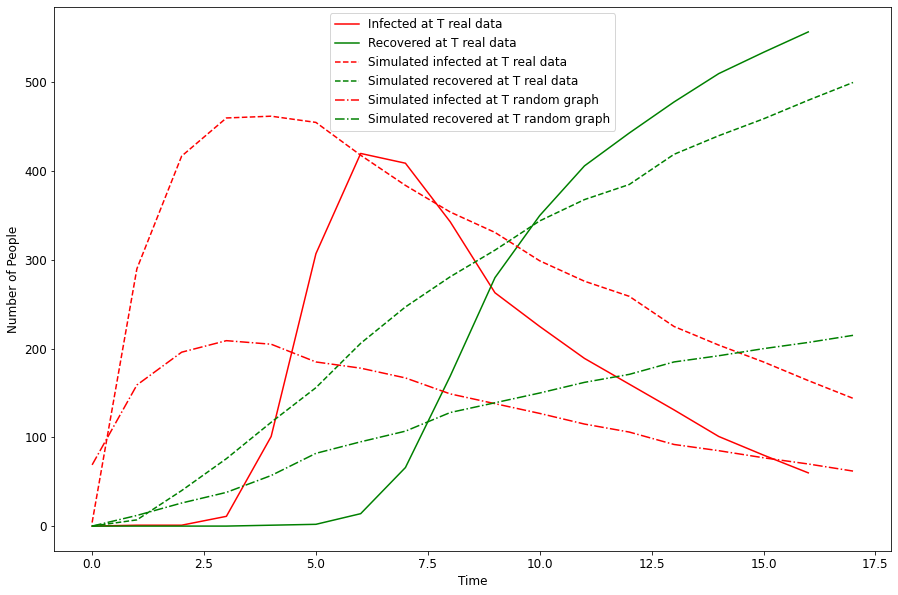

In [53]:
ax = plt.gca()
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams.update({'font.size': 12})
record_model['infected_at_t'].plot(kind='line', color='red', ax=ax, label='Infected at T real data')
record_model['recovered_at_t'].plot(kind='line', color='green', ax=ax, label='Recovered at T real data')

record_model['simulated_infected_at_t'].plot(kind='line', color='red', style='--', ax=ax, label='Simulated infected at T real data')
record_model['simulated_recovered_at_t'].plot(kind='line', color='green', style='--', ax=ax, label='Simulated recovered at T real data')

record_model['random_infected_at_t'].plot(kind='line', color='red', style='-.', ax=ax, label='Simulated infected at T random graph')
record_model['random_recovered_at_t'].plot(kind='line', color='green', style='-.', ax=ax, label='Simulated recovered at T random graph')
ax.legend()
plt.ylabel('Number of People',fontsize=12,)
plt.xlabel('Time',fontsize=12,)
plt.savefig('./comparison_plot.png')
plt.show()